In [1]:
import pandas as pd
import numpy as np
# for the Viz
import matplotlib.pyplot as plt
from wordcloud import WordCloud, get_single_color_func
from PIL import Image

In [2]:
df_with_genre = pd.read_csv("Genres.csv")

In [3]:
df_with_genre.head()

,Data,Genere
0,Fri Jun 28 00:47:04,dubstep
1,Thu Jun 27 11:07:03,dubstep
2,Wed Jun 26 19:17:24,dubstep
3,Wed Jun 26 07:55:04,dubstep
4,Wed Jun 26 05:39:16,dubstep


In [4]:
genre_frequency = df_with_genre.groupby('Genere').count().to_dict()['Data']

In [5]:
#mask = np.array(Image.open("brain_music.jpg"))
#mask = np.array(Image.open("cuffie.png"))
mask = np.array(Image.open("note.png"))

In [6]:
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [7]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [8]:
color_to_words = {
    # words below will be colored with a green single color function
    'black': ['alternative rock','emo','emocore','gothic','grindcore','grunge', 
               'hard rock','hardstyle','heavy metal','krautrock','metal','metalcore',
               'pornogrind', 'progressive', 'psychedelic','psychobilly','punk',
               'rock','rockabilly','rocksteady'],
    # will be colored with a red single color function
    'darkviolet': ['afrobeat', 'ambient','club', 'dance', 'dancehall', 'deep house', 
              'disco', 'downtempo', 'drone', 'dub', 'dubstep', 'ebm', 'electro', 
              'electronic', 'electronica', 'electropop', 'eurodance', 'experimental', 
              'flamenco', 'folk', 'funk', 'fusion', 'garage', 'glam', 'glitch',  'idm',
              'minimal','psytrance', 'indie','house', 'industrial','rave', 
              'techno', 'timba', 'trance', 'trap', 'turntablism', 'vaporwave','synthwave'],
    'lightgreen':['americana', 'bachata', 'ballad', 'bebop', 'bluegrass',
              'britpop','chanson', 'chillout','country', 
              'lounge','jungle','noise',  'pop','rumba', 'schlager',
              'shoegaze', 'ska', 'soca', 'soul', 'swing'],
    'limegreen':['baroque','celtic','classical', 'comedy','gospel', 'medieval','opera', 
        'orchestral','symphony','musical','blues','jazz','instrumental'],
    'blue':['bossa nova', 'cumbia','guaracha','kizomba','latin', 
                  'mambo','merengue', 'milonga','reggae', 'reggaeton',
                  'salsa', 'samba','tango','vallenato']
}

In [9]:
# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)
#grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

In [10]:
wordcloud = WordCloud(background_color='white',mask=mask,margin=5,random_state=1)
wordcloud.generate_from_frequencies(frequencies=genre_frequency)

In [11]:
#if your want to recolor (on your own risk :D)
#wordcloud.recolor(color_func=grouped_color_func)

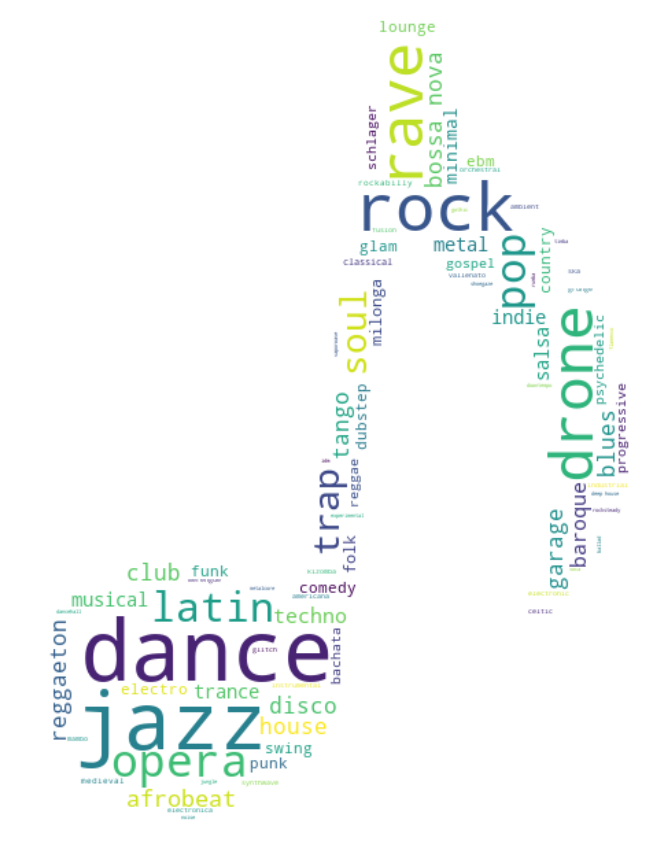

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
wordcloud.to_file("music_word_cloud.png")